# Week 4 — Data Types and Visualization in Geosciences

In computational geosciences, before we model any process, we must first understand how data are represented.

Geological and environmental systems generate different kinds of data, depending on how the information is measured, stored, and interpreted. The type of data determines:

- How it can be visualized
- What type of analysis is appropriate
- What computational tools are required
- What limitations must be considered

In this session, we will explore three fundamental types of data used in geosciences:

1. **Numerical (tabular) data**
2. **Vector (geospatial) data**
3. **Raster (gridded) data**

Understanding these categories is essential for interpreting Earth systems computationally.


## 1. Numerical (Tabular) Data

Numerical data are typically stored in tables, where:

- Rows represent observations (samples, time points, experiments)
- Columns represent variables (chemical species, temperature, pressure, etc.)

Examples in geosciences include:

- Water chemistry measurements (Ca, Mg, Fe, pH)
- Isotopic ratios
- Mineral compositions
- Time-series of environmental monitoring

These datasets are commonly stored in formats such as:

- CSV files
- Excel spreadsheets
- Databases

Typical visualizations:
- Scatter plots
- Histograms
- Time series
- Boxplots

Numerical data are often the starting point for geochemical modeling.


## What is Numerical (Tabular) Data?

A numerical dataset is typically organized as:

- **Rows** → Observations (samples, time points, experiments)
- **Columns** → Variables (measured properties)

Example structure:

| Sample | Ca (mg/L) | Mg (mg/L) | Fe (mg/L) | pH |
|--------|-----------|-----------|-----------|----|
| S1     | 40        | 12        | 0.3       | 7.2|
| S2     | 35        | 10        | 1.2       | 6.8|

This format is fundamental in:

- Geochemistry
- Hydrology
- Petrology
- Environmental monitoring


### Common Numerical Data File Types: `.csv` and `.txt`

Tabular data can be downloaded in many different file formats. 

Spreadsheet formats such as `.xls` and `.xlsx` can be directly opened in Microsoft Excel. However, when downloading Earth and Environmental data, you will often encounter tabular datasets stored in the following formats:

- **`.csv` (Comma Separated Values)**  
  In this format, each column is separated (delimited) by a comma.

- **`.txt` (Text File)**  
  A basic text file format. In `.txt` files, the delimiter (the character that separates columns) can vary. Delimiters may include commas, tabs, semicolons, or spaces.

These formats are text-based and can be opened in simple text editors such as Notepad or other code editors. They can then be imported into Python using **Pandas** for further exploration, analysis, and processing.


## Text Files & Delimiters

A **delimiter** refers to the character that defines the boundary between different sets of information.

In a text file:

- A delimiter separates **columns**
- A line break (return) separates **rows**

Understanding delimiters is essential when working with tabular data in Earth and Environmental sciences.

---

### Example 1 — Comma-Delimited Text File

In a comma-delimited file, each column is separated by a comma `,`.

The example below also includes a header row (column names), separated by commas:

```
site_code, year, month, day, hour, minute, second, time_decimal, value, value_std_dev  
BRW,1973,1,1,0,0,0,1973.0,-999.99,-99.99
BRW,1973,2,1,0,0,0,1973.0849315068492,-999.99,-99.99 
BRW,1973,3,1,0,0,0,1973.1616438356164,-999.99,-99.99 
```


Here is an example of a space delimited text file. In the example below, each column of data are separated by a single space.

```
site_code year month day hour minute second time_decimal value value_std_dev  
BRW 1973 1 1 0 0 0 1973.0 -999.99 -99.99
BRW 1973 2 1 0 0 0 1973.0849315068492 -999.99 -99.99 
BRW 1973 3 1 0 0 0 1973.1616438356164 -999.99 -99.99 
```

### Earth and Environmental Data That Are Stored In Text File Format

There are many different types of data that are stored in text and tabular file formats. Below you will see a few different examples of data that are provided in this format. You will also explore some of the cleanup steps that you need to import and begin to work with the data.

In [2]:
# Import packages
import os

import matplotlib.pyplot as plt
import pandas as pd

If you have a url that links directly to a file online, you can open it using pandas *.read_csv()*. Have a look at the data below - and notice that is has:

3 columns: months, precip and seasons
12 rows: notice that the first row is numered as 0. This is because indexing in Python always starts at 0 rather than 1.

In [16]:
# Download and open the .csv file using Pandas
avg_monthly_precip = pd.read_csv(
    "https://ndownloader.figshare.com/files/12710618")

# View the data that you just downloaded and opened
avg_monthly_precip

,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring
5,June,2.02,Summer
6,July,1.93,Summer
7,Aug,1.62,Summer
8,Sept,1.84,Fall
9,Oct,1.31,Fall


In Pandas, this table format is referred to as a *dataframe*. You can view some stats about the dataframe including the number of columns and rows in the data using *.info()* y *.head(10)*. In case of very large dataframes, the last command prints out the first 10 lines of the dataframe

In [3]:
avg_monthly_precip.info()

avg_monthly_precip.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   months   12 non-null     object 
 1   precip   12 non-null     float64
 2   seasons  12 non-null     object 
dtypes: float64(1), object(2)
memory usage: 420.0+ bytes


,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring


Finally, you can plot the data obtained by using a command similar to:

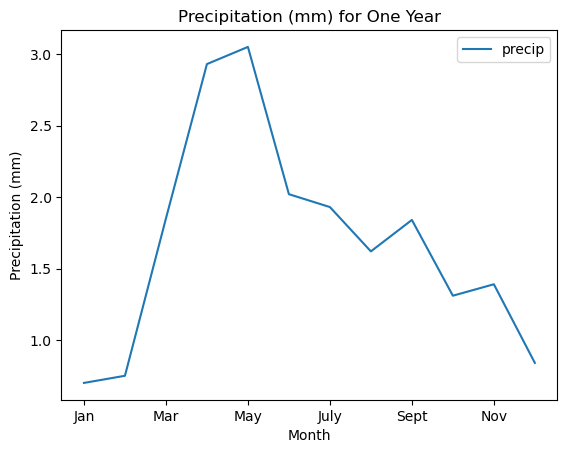

In [8]:
# Plot the data
#f, ax = plt.subplots()

avg_monthly_precip.plot(x="months",
                        y="precip",
                        title="Precipitation (mm) for One Year",ylabel='Precipitation (mm)',xlabel="Month")
plt.show()

here the same plot using the characteristic *color='green'* and *kind='bar'*

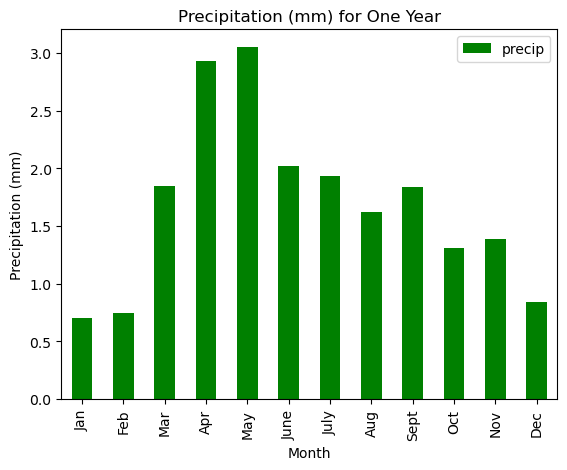

In [9]:
# Plot the data
# f, ax = plt.subplots()
avg_monthly_precip.plot(x="months",
                        y="precip",
                        title="Precipitation (mm) for One Year",ylabel='Precipitation (mm)',xlabel="Month",kind='bar',color='green')
ax.set(xlabel='Month',
       ylabel='Precipitation (mm)')
plt.show()

### Cleaning Tabular Text Files So You Can Open Them in Python

Missing Data Values & Headers in Text Files
Not all text files are as simple as the example above. Many text files have several lines of header text above the data that provide you with useful information about the data itself. This data is referred to as metadata.

Also, often times, there are data missing from the data that were collected. These missing values will be identified using a specific value that is hopefully documented in the metadata for that file.

Next you will explore some temperature data that need to be cleaned up.

In [10]:
# Open temperature data for Miami, Florida
miami_temp_url = "https://www.ncdc.noaa.gov/cag/city/time-series/USW00012839-tmax-12-12-1895-2020.csv"

miami_temp = pd.read_csv(miami_temp_url)
miami_temp

,# Miami,Florida January-December Maximum Temperature
0,# Units: Degrees Fahrenheit,NaN
1,Date,Value
2,194812,83.9
3,194912,83.3
4,195012,82.4
...,...,...
70,201612,84.6
71,201712,85.1
72,201812,85.2
73,201912,86.1


In [11]:
# miami_temp.info()
miami_temp.isna().sum()

#  Miami                                         0
 Florida January-December Maximum Temperature    1
dtype: int64

Notice that the data above contain a few extra rows of information. This information however is important for you to understand.

Missing: -99 – this is the value that represents the “no data” value. Misisng data might occur if a sensor stops working or a measurement isn’t recorded. You will want to remove any missing data values.
Units: Degrees Fahrenheit – it’s always important to first understand the units of the data before you try to interpret what the data are showing!
Below you will use all of the information stored in the header to import your data. You will also remove the first few rows of data because they don’t actually contain any data values. These rows contain metadata.

Function Parameters in Python
A parameter refers to an option that you can specify when running a function in Python. You can adjust the parameters associated with importing your data in the same way that you adjusted the plot type and colors above.

Below you use:

- *skiprows*=: to tell Python to skip the first 3 rows of your data
- *na_values*=: to tell Python to reassign any missing data values to “NA”
NA refers to missing data. When you specify a value as NA (NaN or Not a Number in Python), it will not be included in plots or any mathematical operations.

In [12]:
# Open the Miami data skipping the first 3 rows and setting no data values
miami_temp = pd.read_csv(miami_temp_url,
                         skiprows=2,
                         na_values=-99)

# View the first 5 rows of the data
miami_temp.head(10)

,Date,Value
0,194812,83.9
1,194912,83.3
2,195012,82.4
3,195112,82.6
4,195212,83.2
5,195312,82.7
6,195412,82.3
7,195512,82.4
8,195612,82.3
9,195712,83.1


In [36]:
miami_temp.info()
miami_temp.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    73 non-null     int64  
 1   Value   73 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.3 KB


Date     0
Value    0
dtype: int64

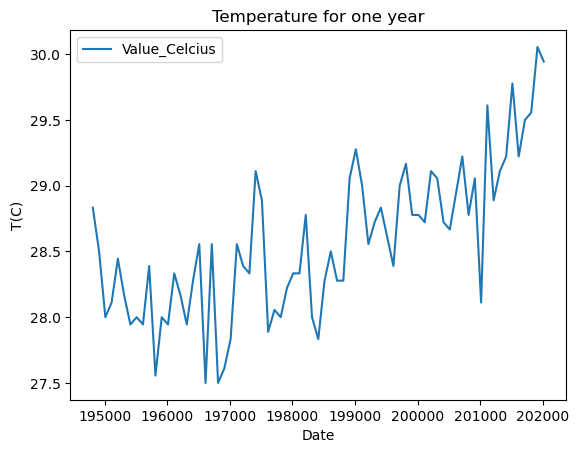

In [18]:
# Plot the data

# Convert temperature from Farenheit to Celcius and create a new column in the DataFrame

miami_temp['Value_Celcius']=(miami_temp['Value']-32)*(5/9)

# Plot the dataframe
miami_temp.plot(x="Date",
                        y="Value_Celcius",
                        title="Temperature for one year", xlabel='Date',
       ylabel='T(C)')
plt.show()

## Problem 1. 

Copy the code below into your code. Run the code. It should download and open a new dataset that has CO2 emissions for a field site in Barrow, Alaska (brw).

The code below will download your data into your working directory. You should be able to open it using the filename `co2-emissions-barrow.csv`.

```python
# Download greenhouse gas CO2 data
import urllib.request

greenhouse_gas_url = "ftp://aftp.cmdl.noaa.gov/data/trace_gases/co2/in-situ/surface/brw/co2_brw_surface-insitu_1_ccgg_MonthlyData.txt"

urllib.request.urlretrieve(
    url=greenhouse_gas_url,
    filename="co2-emissions-barrow.csv"
)

Once you have downloaded the data:

- Read the data using pandas read_csv().
- The data has some additional rows of information stored as metadata. You will need to use the skiprows= parameter to skip those metadata     rows and properly import the data.
   HINT: remember when you use skiprows to consider 0-based indexing.
- the data columns are separated by blank spaces rather than commas so use sep=" " for pandas to understand the dataframe    
- Finally plot the data using pandas. Plot the "time_decimal" column on the x-axis and "value" on the y-axis.

What problem do you see in this plot? It seems that there some data that need to be removed before we can use the dataset. Usually, NOAA data contain data registered as -99.99, -999.99, etc.  in this case use the following command to see you see any data 

```
co2_df["value"].describe()
```
and play attention to the smallest data reported in thos column of the dataframe. Now, in order to remove this data use something like  

```
co2_df["value"].min()
co2_df[co2_df["value"] < -???]
import numpy as np
co2_df.loc[co2_df["value"] < 0, "value"] = np.nan
```

Reemplace ??? by a number you consider appropriate. Once you finish, plot again the data. You should end up with a figure similar to 

## CO2 in Atmosphere

![CO2 Plot](co2_in_atmosphere.jpg)

### Multpi-plot figures

Using matplotlib’s object-oriented approach makes it easier to include more than one plot in a figure by creating additional axis objects.

<div style="text-align: center;">
    <img src="fig-2-plots.png" width="600"><br>
    <em>A raster is composed of a regular grid of cells. Each cell is the same size in the x and y direction. Source: Colin Williams, NEON</em>
</div>

When adding more than one axis object, it is good practice to give them distinct names (such as ax1 and ax2), so you can easily work with each axis individually.

You will need to provide new arguments to plt.subplots for the layout of the figure: number of rows and columns:

plt.subplots(1, 2)

In this example, 1, 2 indicates that you want the plot layout to be 1 row across 2 columns.

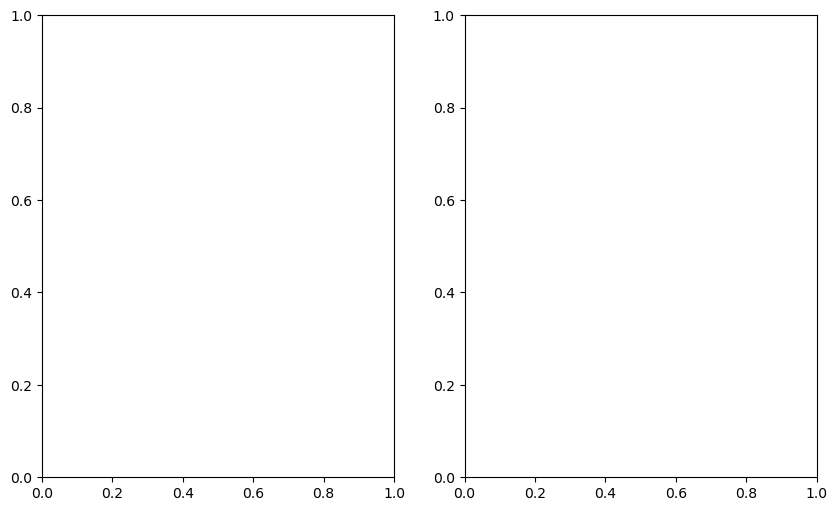

In [3]:
# Figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))

Conversely, 2, 1 indicates that you want the plot layout to be 2 rows across one column.

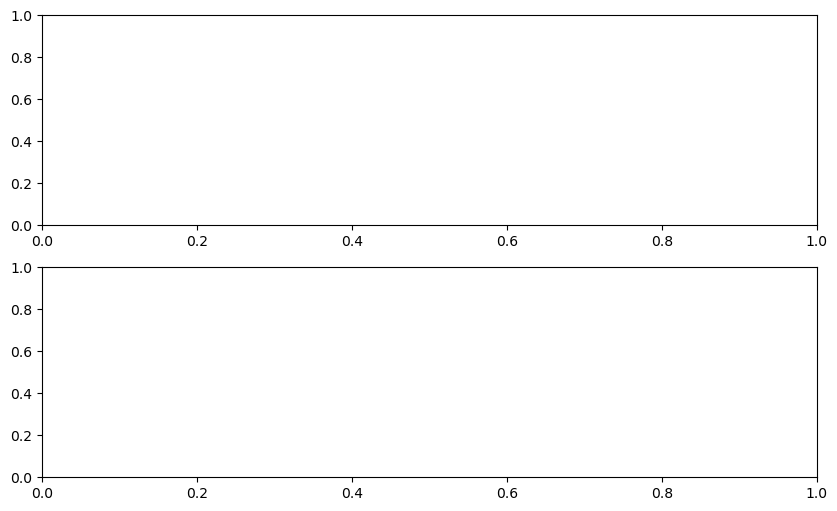

In [4]:
# Figure with two plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 6))

Because you have defined figsize=(10, 6), the figure space remains the same size regardless of how many rows or columns you request.

You can play around with both the number of rows and columns as well as figsize to arrive at the look that you want.

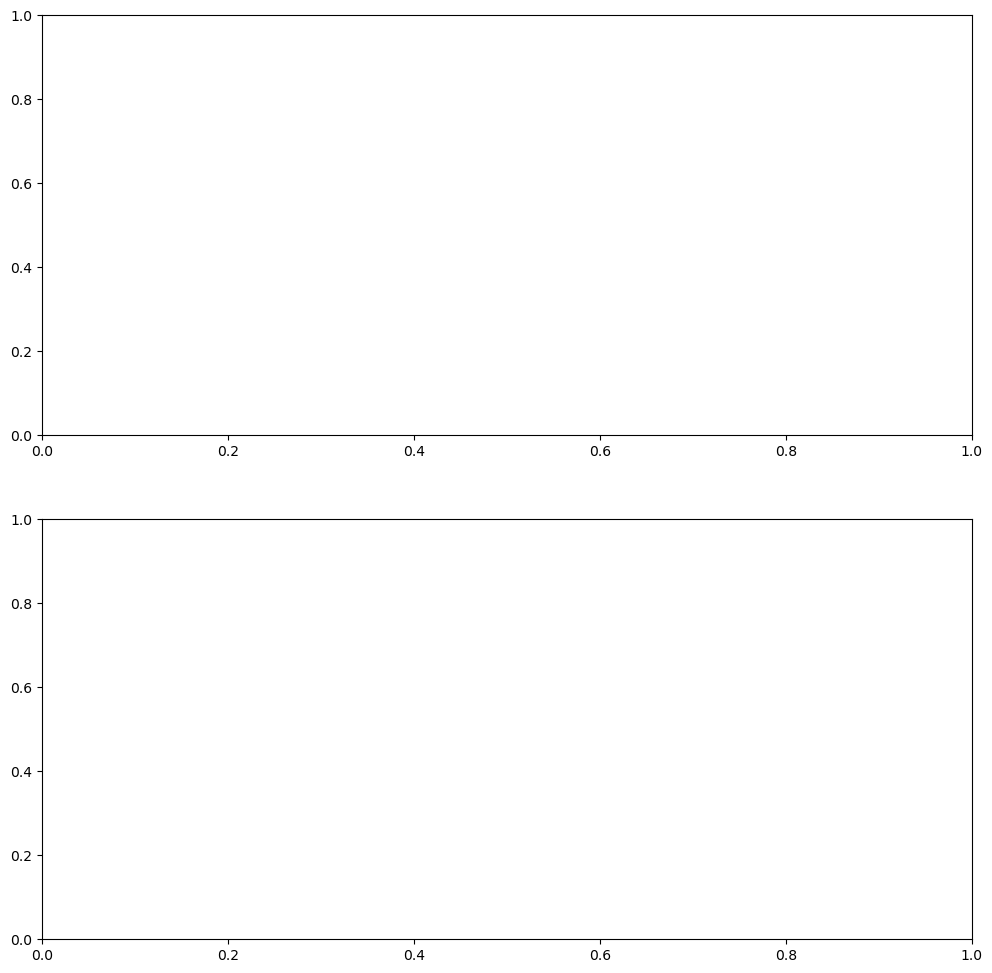

In [5]:
# Figure with two plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 12))

You can continue to add as many as axis objects as you need to create the overall layout of the desired figure and continue adjusting the figsize as needed.

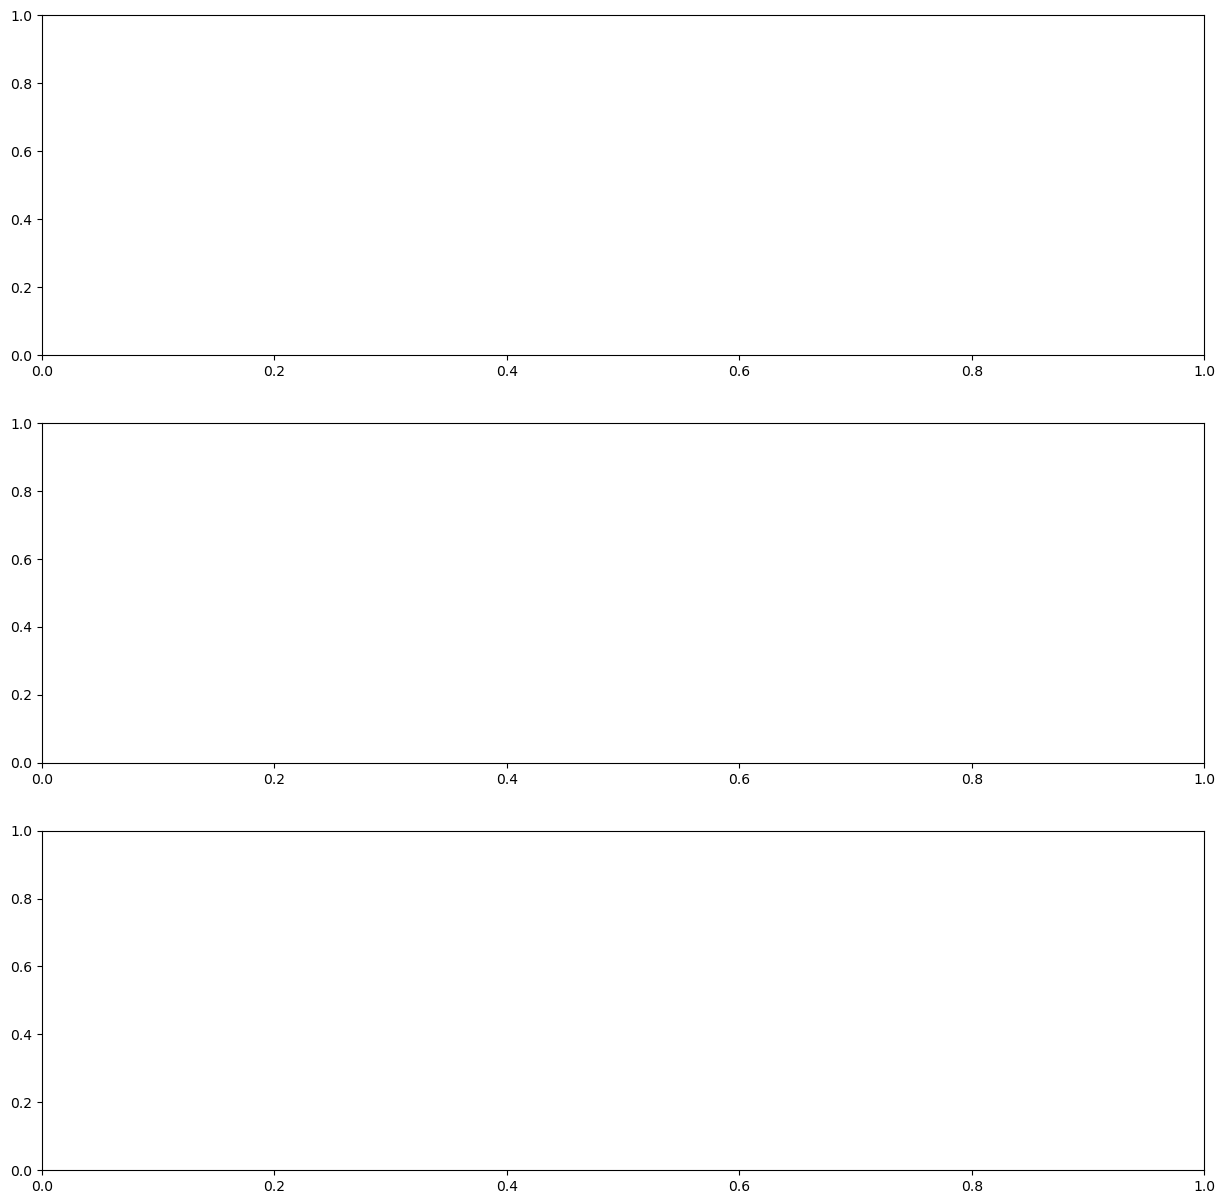

In [6]:
# Figure with three plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (15, 15))

A key benefit of the matplotlib object oriented approach is that each axis is its own object and can be customized independently of the other plots in the figure.

You will learn how to take advantage of this capability to customize individual plots on the next page of this chapter.

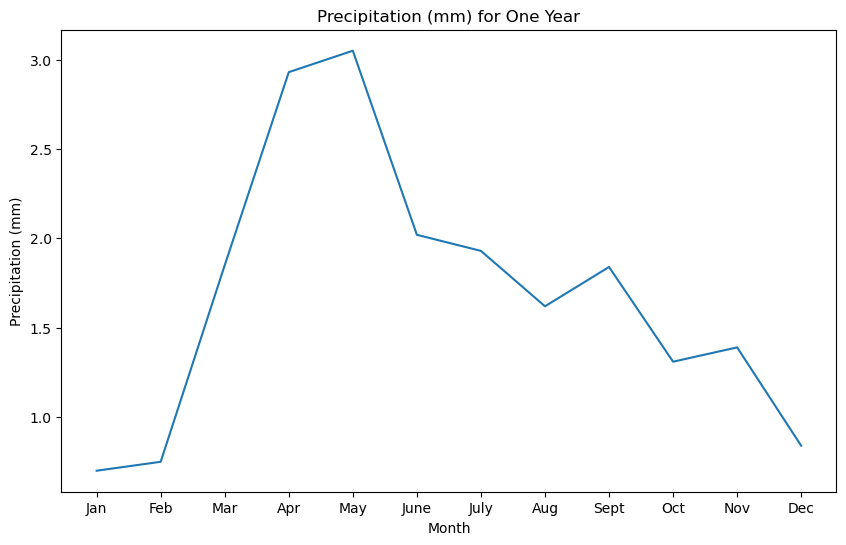

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(avg_monthly_precip["months"], 
        avg_monthly_precip["precip"])

ax.set_title("Precipitation (mm) for One Year")
ax.set_xlabel("Month")
ax.set_ylabel("Precipitation (mm)")

plt.show()

Plot several figures together

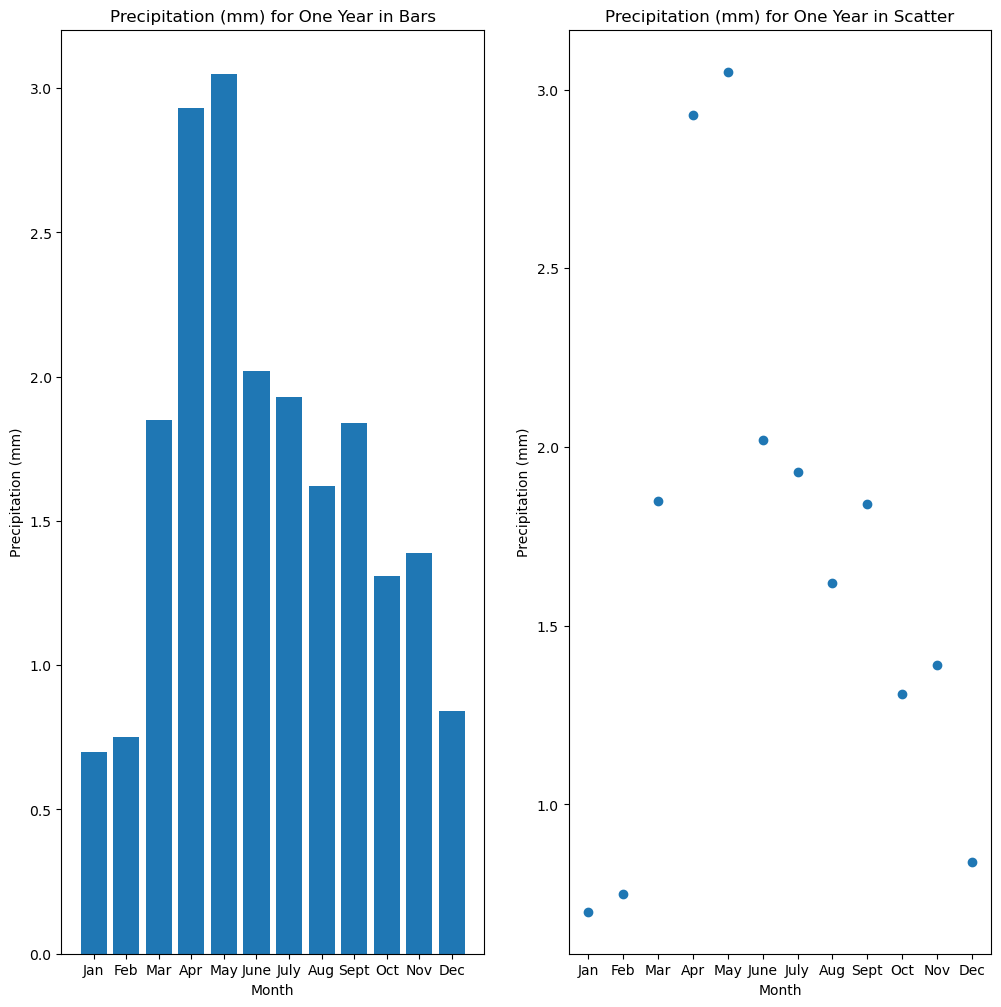

In [24]:
# Define plot space
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

# Infor for figure 1
ax1.bar(avg_monthly_precip["months"], 
        avg_monthly_precip["precip"])

ax1.set_title("Precipitation (mm) for One Year in Bars")
ax1.set_xlabel("Month")
ax1.set_ylabel("Precipitation (mm)")

# Info for figure 2
ax2.scatter(avg_monthly_precip["months"], 
        avg_monthly_precip["precip"])

ax2.set_title("Precipitation (mm) for One Year in Scatter")
ax2.set_xlabel("Month")
ax2.set_ylabel("Precipitation (mm)")

plt.show()

# Save a Matplotlib Figure As An Image File

You can easily save a figure to an image file such as .png using:

plt.savefig("path/name-of-file.png")

which will save the latest figure rendered.

If you do not specify a path for the file, the file will be created in your current working directory.

Review the Matplotlib documentation to see a list of the additional file formats that be used to save figures.

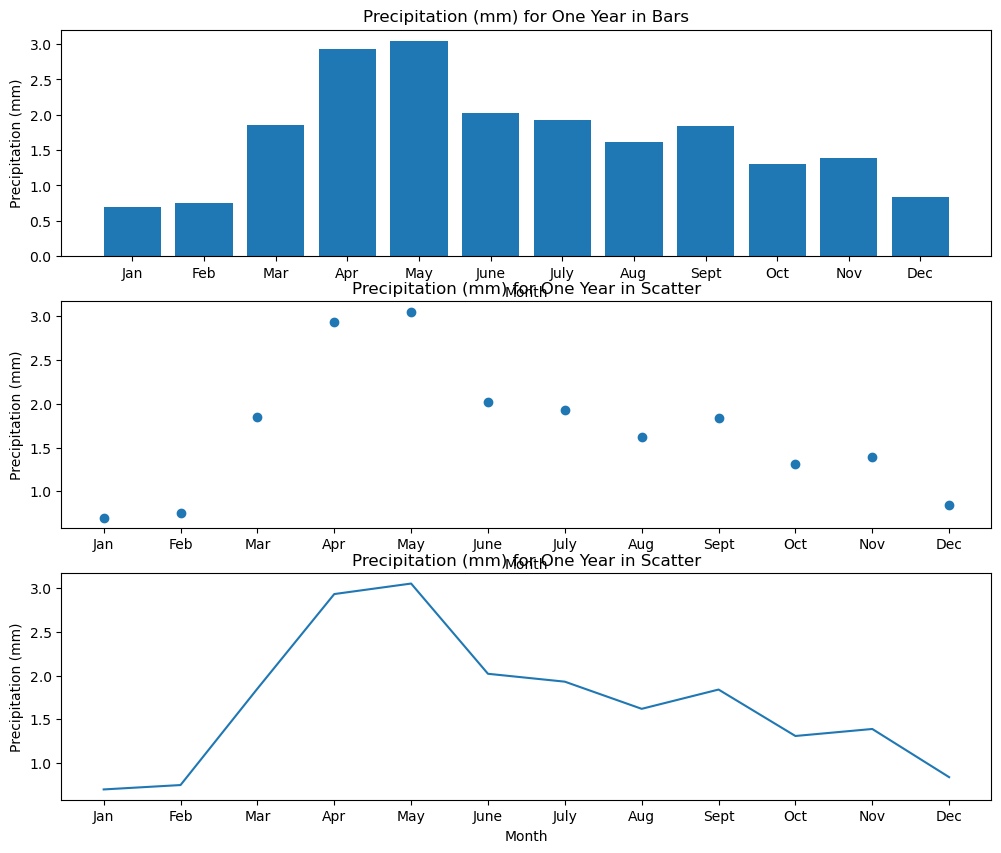

In [31]:
# Define plot space
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Infor for figure 1
ax1.bar(avg_monthly_precip["months"], 
        avg_monthly_precip["precip"])

ax1.set_title("Precipitation (mm) for One Year in Bars")
ax1.set_xlabel("Month")
ax1.set_ylabel("Precipitation (mm)")

# Info for figure 2
ax2.scatter(avg_monthly_precip["months"], 
        avg_monthly_precip["precip"])

ax2.set_title("Precipitation (mm) for One Year in Scatter")
ax2.set_xlabel("Month")
ax2.set_ylabel("Precipitation (mm)")

# Info for figure 3
ax3.plot(avg_monthly_precip["months"], 
        avg_monthly_precip["precip"])

ax3.set_title("Precipitation (mm) for One Year in Scatter")
ax3.set_xlabel("Month")
ax3.set_ylabel("Precipitation (mm)")

plt.savefig("average-monthly-precip.png")

plt.show()

# Problem 2

#### Step 1 — Choose Data
In this exercise, you will create your own visualization using a dataset of your choice.
Step 1 — Choose Data
You may:
- Use a dataset you already have (CSV, Excel, etc.)
- Use publicly available data (e.g., climate, population, finance, etc.)
- Create a small synthetic dataset yourself (e.g., temperature vs. time)

Your dataset must contain at least:

- One independent variable (x-axis)
- One dependent variable (y-axis)

#### Step 2 — Create a Plot
Using matplotlib (object-oriented approach):
- Create a figure and axes
- Plot the data
- Add:
    - Title
    - X label
    - Y label
    - Units (if applicable)

Since this is a course applied to Earth sciences, I expect you have several subplots from your data. For example, Plots of temperature vs. time, precipitation vs. month, CO₂ vs. year, or any environmental variable and interpret the physical meaning of the trend.







#### Step 2 — Create a Plot
Using matplotlib (object-oriented approach):
Create a figure and axes
Plot the data
Add:
Title
X label
Y label
Units (if applicable)